In [152]:
import ot
import numpy as np
import matplotlib.pyplot as plt


# %%


def draw_points(first_set, second_set, coupling, *args, **kwargs):
    is_zero = coupling <= 1e-16
    zero_from_first = is_zero.all(axis=1)
    zero_from_second = is_zero.all(axis=1)

    plt.scatter(first_set[~zero_from_first][:, 0], first_set[~zero_from_first][:, 1], c='blue')
    plt.scatter(second_set[~zero_from_second][:, 0], second_set[~zero_from_second][:, 1], c='green')
    plt.scatter(first_set[zero_from_first][:, 0], first_set[zero_from_first][:, 1], c='black')
    plt.scatter(second_set[zero_from_second][:, 0], second_set[zero_from_second][:, 1], c='black')
    plt.show()

In [153]:
x1 = np.linspace(0, 0.2, num=100)
y1 = np.linspace(0, 0.2, num=100)
xx1, yy1 = np.meshgrid(x1, y1)
# %%
x2 = np.linspace(0.7, 1, num=100)
y2 = np.linspace(0.7, 1, num=100)
xx2, yy2 = np.meshgrid(x2, y2)
# %%
# first_set = np.stack((xx1.ravel(), yy1.ravel()), axis=1)

# second_set = np.stack((xx2.ravel(), yy2.ravel()), axis=1)

In [154]:
mask_1 = ((xx1 - 0.1)**2 + (yy1 - 0.1)**2 <= 0.01)
mask_2 = ((xx2 - 0.8)**2 + (yy2 - 0.8)**2 <= 0.02)

In [155]:
first_set = np.stack((xx1[mask_1], yy1[mask_1]), axis=1)
second_set = np.stack((xx2[mask_2], yy2[mask_2]), axis=1)
distance_matrix = ot.dist(first_set, second_set)
distance_matrix /= np.max(distance_matrix)

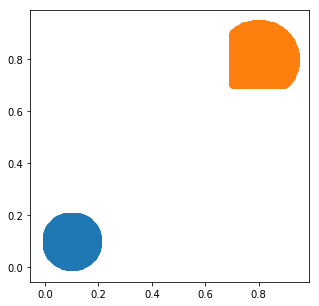

In [157]:
plt.figure(figsize=(5, 5))
plt.scatter(xx1[mask_1], yy1[mask_1])
plt.scatter(xx2[mask_2], yy2[mask_2])
plt.show()

In [158]:
a = np.ones(distance_matrix.shape[0]) / distance_matrix.shape[0]
b = np.ones(distance_matrix.shape[1]) / distance_matrix.shape[1]
# %%
coupling = ot.bregman.partial_transport(a, b, distance_matrix, reg=0.005, verbose=20, stopThr=1e-9, theta=1e-9, m=0.7, log=True)
print(coupling)

It.  |Err         
-------------------
    0|1.035495e-02|
    1|2.649139e-03|
    2|1.600649e-03|
    3|1.152215e-03|
    4|9.028078e-04|
    5|7.438065e-04|
    6|6.335178e-04|
    7|5.520367e-04|
    8|4.896300e-04|
    9|4.398877e-04|
   10|3.992589e-04|
   11|3.654283e-04|
   12|3.367314e-04|
   13|3.120099e-04|
   14|2.905670e-04|
   15|2.716875e-04|
   16|2.548550e-04|
   17|2.398840e-04|
   18|2.263754e-04|
   19|2.140396e-04|
It.  |Err         
-------------------
   20|2.029014e-04|
   21|1.927049e-04|
   22|1.833037e-04|
   23|1.746106e-04|
   24|1.665510e-04|
   25|1.590609e-04|
   26|1.520785e-04|
   27|1.455532e-04|
   28|1.394334e-04|
   29|1.336765e-04|
   30|1.282504e-04|
   31|1.231555e-04|
   32|1.184072e-04|
   33|1.138720e-04|
   34|1.095448e-04|
   35|1.054961e-04|
   36|1.016880e-04|
   37|9.801201e-05|
   38|9.458770e-05|
   39|9.133197e-05|
It.  |Err         
-------------------
   40|8.818129e-05|
   41|8.527918e-05|
   42|8.242183e-05|
   43|7.978275e-05|
   

  373|2.064875e-08|
  374|2.012885e-08|
  375|1.962200e-08|
  376|1.912787e-08|
  377|1.864614e-08|
  378|1.817651e-08|
  379|1.771867e-08|
It.  |Err         
-------------------
  380|1.727232e-08|
  381|1.683718e-08|
  382|1.641298e-08|
  383|1.599943e-08|
  384|1.559628e-08|
  385|1.520325e-08|
  386|1.482011e-08|
  387|1.444660e-08|
  388|1.408248e-08|
  389|1.372751e-08|
  390|1.338147e-08|
  391|1.304414e-08|
  392|1.271529e-08|
  393|1.239472e-08|
  394|1.208221e-08|
  395|1.177757e-08|
  396|1.148059e-08|
  397|1.119109e-08|
  398|1.090887e-08|
  399|1.063376e-08|
It.  |Err         
-------------------
  400|1.036558e-08|
  401|1.010415e-08|
  402|9.849301e-09|
  403|9.600872e-09|
  404|9.358700e-09|
  405|9.122628e-09|
  406|8.892503e-09|
  407|8.668175e-09|
  408|8.449499e-09|
  409|8.236333e-09|
  410|8.028539e-09|
  411|7.825980e-09|
  412|7.628527e-09|
  413|7.436050e-09|
  414|7.248425e-09|
  415|7.065529e-09|
  416|6.887243e-09|
  417|6.713452e-09|
  418|6.544042e-09|
  

In [159]:
p = coupling[0].sum(axis=1) / 0.7
q = coupling[0].sum(axis=0) / 0.7

In [160]:
def draw_points_1(threshold):
    zero_from_first = (p < threshold)
    zero_from_second = (q < threshold)

    plt.scatter(first_set[~zero_from_first][:, 0], first_set[~zero_from_first][:, 1], c='blue')
    plt.scatter(second_set[~zero_from_second][:, 0], second_set[~zero_from_second][:, 1], c='green')
    plt.scatter(first_set[zero_from_first][:, 0], first_set[zero_from_first][:, 1], c='black')
    plt.scatter(second_set[zero_from_second][:, 0], second_set[zero_from_second][:, 1], c='black')
    plt.show()

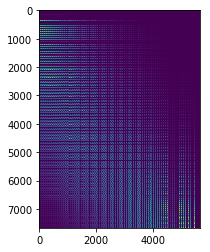

In [161]:
plt.imshow(coupling[0])

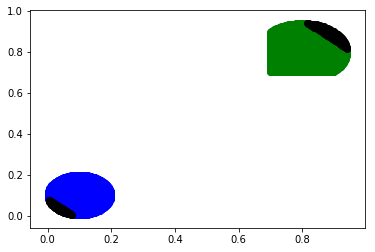

In [168]:
draw_points_1(threshold=1e-10)